<a href="https://colab.research.google.com/github/SuhaVaqar/Mental-Health-Twitter-Sentiment-Analysis/blob/main/Sentiment_Analysis_TwitterDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Mental-Health-Twitter.csv to Mental-Health-Twitter.csv


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df =  pd.read_csv('Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [ ]:
# Total Number of rows and columns in the DataFrame
df.shape

(20000, 11)

In [ ]:
# check for missing values
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [ ]:
# keep only the required columns
df = df[['post_text']]
# Display the first few rows of the modified DataFrame
print(df.head())

                                           post_text
0  It's just over 2 years since I was diagnosed w...
1  It's Sunday, I need a break, so I'm planning t...
2  Awake but tired. I need to sleep but my brain ...
3  RT @SewHQ: #Retro bears make perfect gifts and...
4  It’s hard to say whether packing lists are mak...


In [ ]:
# summary statistics of the numeric columns in a DataFrame.
df.describe()

,post_text
count,20000
unique,19488
top,Oh crap! It's a trap! Aleph took damage.
freq,15


In [ ]:
df.shape

(20000, 1)

In [ ]:
# Change all characters in tweets to lowercase
df["post_text"] = df["post_text"].str.lower()

# Remove numbers from tweets
df["post_text"] = df["post_text"].apply(lambda x: re.sub(r'\d+', '', x))

# Remove punctuation from tweets
df["post_text"] = df["post_text"].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
# Import NLTK (Natural Language Toolkit) for stopwords
!pip install textblob
!pip install nltk

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Define the stopwords
sw = set(stopwords.words("english"))

# Remove stopwords
df["post_text"] = df["post_text"].apply(lambda x: " ".join(word for word in x.split() if word not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from textblob import Word
import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")

# Lemmatize individual words in each tweet
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize each word in the "post_text" column and create a new column "tokens"
df["tokens"] = df["post_text"].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

,post_text,tokens
0,year since diagnosed anxiety depression today ...,"[year, since, diagnosed, anxiety, depression, ..."
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit..."
2,awake tired need sleep brain idea,"[awake, tired, need, sleep, brain, idea]"
3,rt sewhq retro bear make perfect gift great be...,"[rt, sewhq, retro, bear, make, perfect, gift, ..."
4,hard say whether packing list making life easi...,"[hard, say, whether, packing, list, making, li..."


In [ ]:
# Applying sentiment to entire dataset
blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [ ]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,0.900000,0.875000
4,-0.045833,0.370833


In [ ]:
# Combine both df and df2
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,tokens,polarity,subjectivity
0,year since diagnosed anxiety depression today ...,"[year, since, diagnosed, anxiety, depression, ...",0.100000,1.000000
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750,0.750000
2,awake tired need sleep brain idea,"[awake, tired, need, sleep, brain, idea]",-0.400000,0.700000
3,rt sewhq retro bear make perfect gift great be...,"[rt, sewhq, retro, bear, make, perfect, gift, ...",0.900000,0.875000
4,hard say whether packing list making life easi...,"[hard, say, whether, packing, list, making, li...",-0.045833,0.370833


In [ ]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','tokens','polarity']]
df4.head(6)

,post_text,tokens,polarity
0,year since diagnosed anxiety depression today ...,"[year, since, diagnosed, anxiety, depression, ...",0.100000
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750
2,awake tired need sleep brain idea,"[awake, tired, need, sleep, brain, idea]",-0.400000
3,rt sewhq retro bear make perfect gift great be...,"[rt, sewhq, retro, bear, make, perfect, gift, ...",0.900000
4,hard say whether packing list making life easi...,"[hard, say, whether, packing, list, making, li...",-0.045833
5,making packing list new hobby movinghouse,"[making, packing, list, new, hobby, movinghouse]",0.136364


In [ ]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,post_text,tokens,polarity,Sentiment
0,year since diagnosed anxiety depression today ...,"[year, since, diagnosed, anxiety, depression, ...",0.100000,Positive
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750,Negative
2,awake tired need sleep brain idea,"[awake, tired, need, sleep, brain, idea]",-0.400000,Negative
3,rt sewhq retro bear make perfect gift great be...,"[rt, sewhq, retro, bear, make, perfect, gift, ...",0.900000,Positive
4,hard say whether packing list making life easi...,"[hard, say, whether, packing, list, making, li...",-0.045833,Negative


<ipython-input-21-359245b97bbe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index, y=result.values, palette=["red", "green"], edgecolor = 'black')


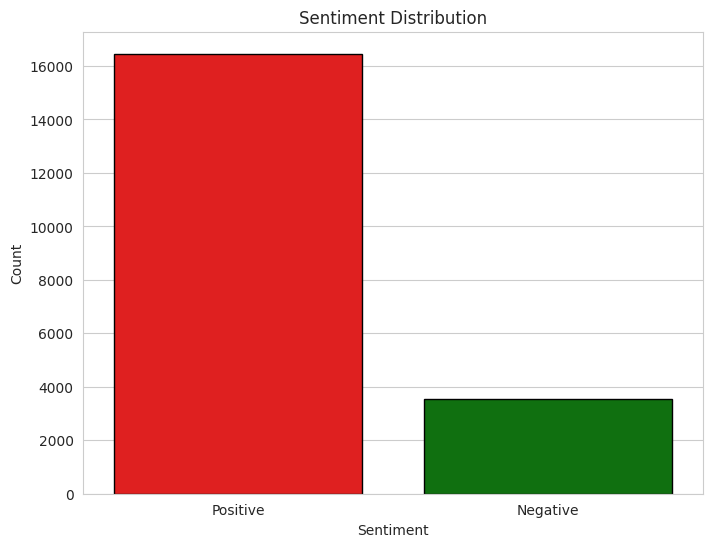

In [ ]:
# Calculate sentiment value counts
result = df4["Sentiment"].value_counts()

# Set Seaborn style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=result.index, y=result.values, palette=["red", "green"], edgecolor = 'black')
plt.xticks(rotation=0)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")

# Show the plot
plt.show()

In [ ]:
df4.groupby("Sentiment").count()

,post_text,tokens,polarity
Sentiment,,,
Negative,3540,3540,3540
Positive,16460,16460,16460


In [ ]:
# returns the tweets with maximum polarity i.e. most negative tweets
df4.groupby("polarity").max().head(5)

,post_text,tokens,Sentiment
polarity,,,
-1.000000,worst bumbling stumbling statement ive seen in...,"[worst, bumbling, stumbling, statement, ive, s...",Negative
-0.900000,sickening httpstcokoohihbrx,"[sickening, httpstcokoohihbrx]",Negative
-0.900000,keitholbermann thats one word would go traitor...,"[keitholbermann, thats, one, word, would, go, ...",Negative
-0.875000,gop lawmaker asks twitter vote whether obamaca...,"[gop, lawmaker, asks, twitter, vote, whether, ...",Negative
-0.857143,sick perceived anything everything im told dri...,"[sick, perceived, anything, everything, im, to...",Negative


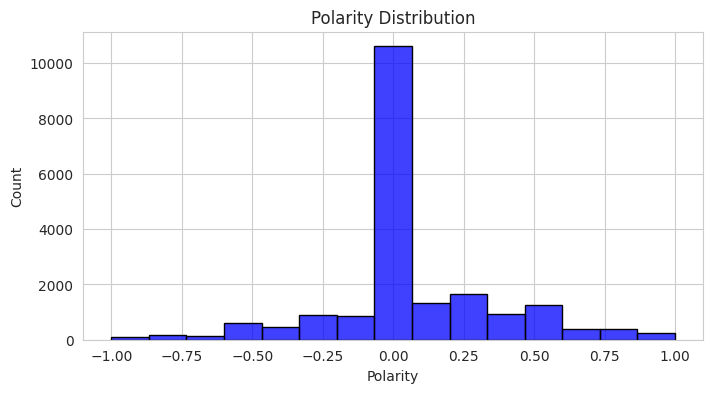

In [ ]:
# Visualize distribution of polarity
plt.figure(figsize=(8, 4))
sns.histplot(df4['polarity'], bins=15, kde=False, color="blue", edgecolor = 'black')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')
plt.show()

<ipython-input-25-dbdb7c1686ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df4, order=df4['Sentiment'].value_counts().index, palette=["orange", "green"])


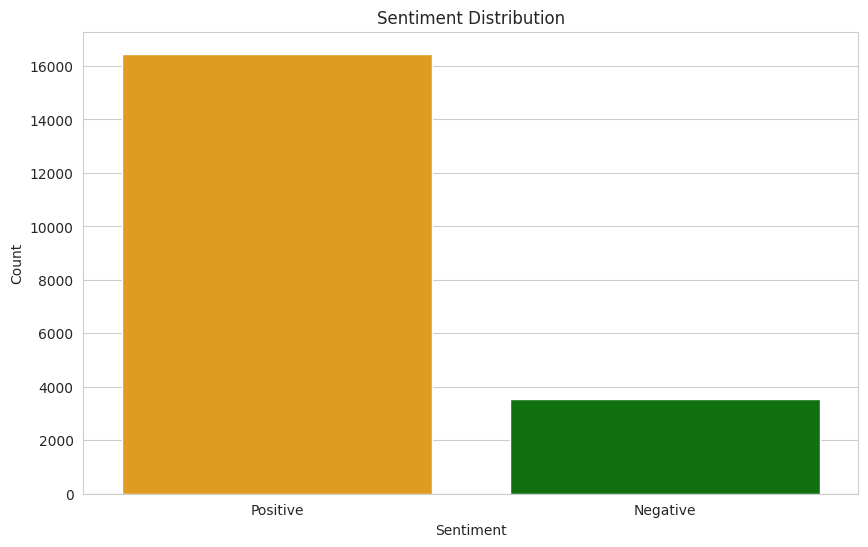

In [ ]:
# Visualize distribution of sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df4, order=df4['Sentiment'].value_counts().index, palette=["orange", "green"])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Convert the text data into numerical features using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9395


In [ ]:
# Create a classification report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.80      0.90      0.84       723
    Positive       0.98      0.95      0.96      3277

    accuracy                           0.94      4000
   macro avg       0.89      0.92      0.90      4000
weighted avg       0.94      0.94      0.94      4000



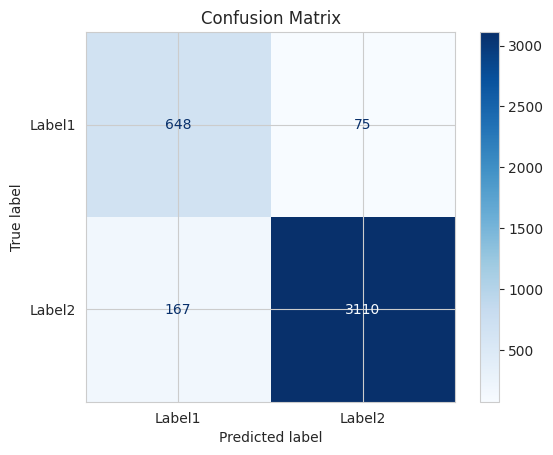

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Label1", "Label2"])
disp.plot(cmap="Blues", values_format="d")  # You can adjust the color map and format as needed
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(clf.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(clf.score(X_test, y_test)*100,2),'%')

The training score is 100.0 %
The testing score is 93.95 %


In [ ]:
# check to see if data is balanced
df4['Sentiment'].value_counts()

Sentiment
Positive    16460
Negative     3540
Name: count, dtype: int64

In [ ]:
# create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Evaluate the classifier on the testing set
accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.92875


In [ ]:
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(rfc.predict(X_test), y_test) * 100, 2))

The accuracy of the Random Forest Classifier is 92.88


In [ ]:
# Create a classification report
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.80      0.81      0.80       723
    Positive       0.96      0.95      0.96      3277

    accuracy                           0.93      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.93      0.93      0.93      4000



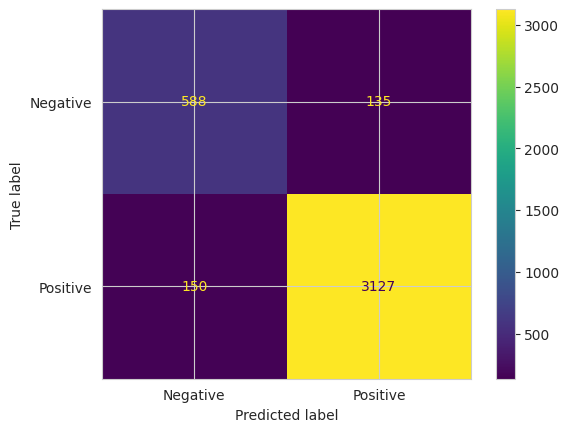

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rfc.predict(X_test))

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

In [ ]:
# create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluate the classifier on the testing set
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.844


In [ ]:
# Get the accuracy score of the model
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')

The accuracy of the KNN Classifier is 84.4 %


In [ ]:
# Create a classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.80      0.18      0.30       723
    Positive       0.85      0.99      0.91      3277

    accuracy                           0.84      4000
   macro avg       0.82      0.59      0.61      4000
weighted avg       0.84      0.84      0.80      4000



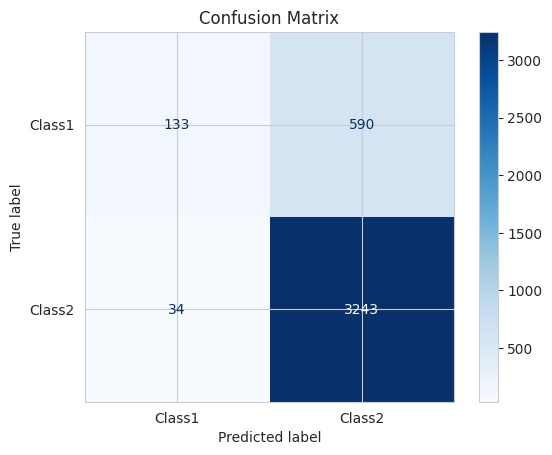

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, knn.predict(X_test))

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class1", "Class2"])  # Replace "Class1" and "Class2" with your class labels
disp.plot(cmap="Blues", values_format="d")  # You can adjust the color map and format as needed
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.883


In [ ]:
# Create a classification report
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.87      0.41      0.56       723
    Positive       0.88      0.99      0.93      3277

    accuracy                           0.88      4000
   macro avg       0.88      0.70      0.75      4000
weighted avg       0.88      0.88      0.87      4000



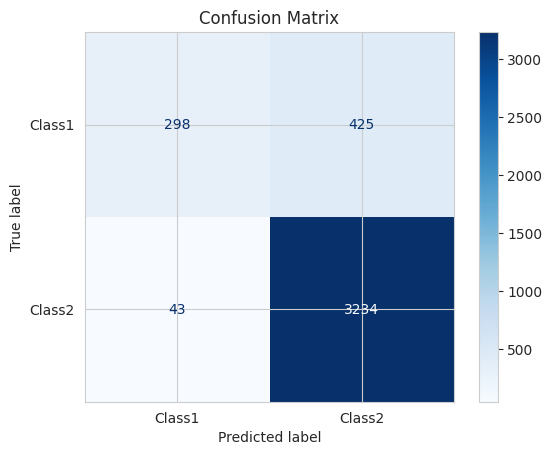

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, nb.predict(X_test))

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class1", "Class2"])  # Replace "Class1" and "Class2" with your class labels
disp.plot(cmap="Blues", values_format="d")  # You can adjust the color map and format as needed
plt.title("Confusion Matrix")
plt.show()